In [1]:
using Controlz # this *might* take a few min to compile
using PyPlot # for plotting via matplotlib
using Printf

# (optional) hipster plot theme
PyPlot.matplotlib.style.use(normpath(joinpath(pathof(Controlz), "..", "hipster.mplstyle")))

# drug partitioning between blood stream and GI tract

(continuing from the written portion of the studio...)

(1) Use the following parameters:
* $\alpha=1/6$ hr$^{-1}$
* $\beta = 1/4$ hr$^{-1}$
* $V_b=V_g=1$ L

Define them as variables below. Use Julia's unicode capability!

In [15]:
β = 1.0 / 4.0
α = 1.0 / 6.0
Vb = Vg = 1.0

1.0

(2) contruct the transfer function from part (a) in `Controlz.jl` that relates changes in $I$ to changes in $G$.

In [16]:
g_gi = 1 / (β * Vg) / (s / β + 1)


    4.0
-----------
4.0*s + 1.0

(3) contruct the transfer function from part (b) in `Controlz.jl` that relates changes in $G$ to changes in $B$.

In [17]:
g_bg = β * Vg / (α * Vb) / (s / α + 1)


    1.5
-----------
6.0*s + 1.0

(4) contruct the transfer function from part (c) in `Controlz.jl` that relates changes in $I$ to changes in $B$.

In [18]:
g_bi = 1 / (α * Vb) / ((s / α + 1) * (s / β + 1))


          6.0
-----------------------
24.0*s^2 + 10.0*s + 1.0

(5) the transfer function from (4) should be the product of the two transfer functions from part (2) and (3), right? compute the product of these transfer functions in `Controlz.jl`. yes, `Controlz.jl` can multiply transfer functions for you! see [docs](https://simonensemble.github.io/Controlz.jl/dev/tfs/#transfer-function-algebra-1). are they the same indeed?

In [19]:
g_gi * g_bg


          6.0
-----------------------
24.0*s^2 + 10.0*s + 1.0

instead of looking at the numbers, to compare by eye, you can let `Controlz.jl` compare the transfer functions form you using `g1 == g2` or `isapprox(g1, g2)`.

In [20]:
g_gi * g_bg == g_bi

true

(6) visualize the poles of this second order transfer function $B(s)/I(s)$ using `viz_poles_and_zeros`. Are the poles real? Do the poles have imaginary parts? Are the real parts of the poles negative? etc.

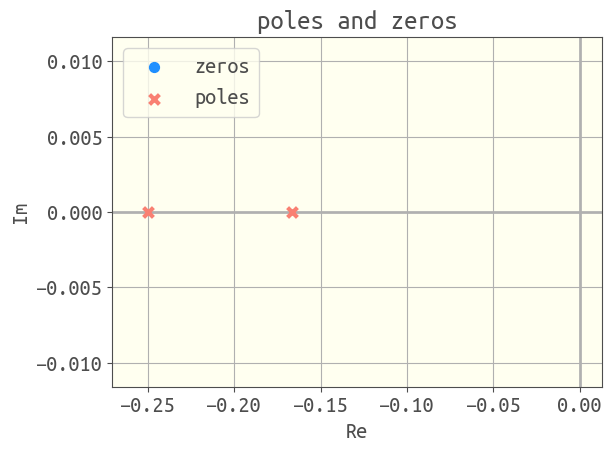

In [21]:
viz_poles_and_zeros(g_bi)

(7) Swallowing a pill of $A=3$ mg at $t=0$ can be modeled as an impulse input $I(t)=A \delta(t)$, with $\delta(t)$ the Dirac delta function. In `Controlz.jl`, simulate the response $b(t)$ to this pill-swallowing input if $A=3$ mg. simulate for $t=24$ hours. use `ylabel("blah")` and `xlabel("blah")` after `viz_response` to overwrite the y- and x-labels with appropriate labels that indicate units.

In [ ]:
A = 3.0
I = A
B = g_bi * I

t, b = simulate(B, 24.0)
viz_response(t, b)
ylabel(L"$b(t)$ [mg/L]")
xlabel(L"$t$ [hr]")

(7a) what is qualitatively different about the first and this second order impulse response?

the peak concentration is not at $t=0$ here, whereas it is in the first order impulse response.

(7b) what is the peak concentration of the drug in the blood stream? do not eyeball the figure; rather use Julia. hint: there is a `maximum` function.

In [ ]:
println("max concentration in blood (mg/L): ", maximum(b))

(7c) when (at what time $t$) does the peak blood concentration occur? again, use code to answer this question. the `argmax` function might be helpful. (see [docs](https://docs.julialang.org/en/v1/base/collections/#Base.argmax))

In [11]:
println("time when max concentration in blood occurs (hr): ", t[argmax(b)])

time when max concentration in blood occurs (hr): 4.948461546391752


(7d) the drug is not effective if its concentration in the blood is less than 0.6 mg/L.

(i) how many hours does it take for the drug to be effective?

(ii) when does the effectiveness of the drug wear off?

this is a programming exercise; do not eyeball the figure, but rather use the arrays from `simulate` to answer this question. 

options for an approach:
* the traditional way. write a `for` loop and print something within the for loop under certain conditions.
* the Julia way. use `findfirst`, `findlast`, and array comparison.

In [12]:
# find first time it becomes effective
#  (loop through array)
for i = 1:length(t)
    if b[i] > 0.6
        println("drug becomes effective at t = ", t[i], " hours")
        break
    end
end

# find last time it becomes effective
#  (loop through array backwards)
for i = 0:length(t)-1
    if b[end-i] > 0.6
        println("drug becomes effective at t = ", t[end-i], " hours")
        break
    end
end

drug becomes effective at t = 0.9897003092783505 hours
drug becomes effective at t = 13.855674329896907 hours


In [13]:
println("drug effective for t ∈ [", t[findfirst(b .> 0.6)], " , " , t[findlast(b .> 0.6)])

drug effective for t ∈ [0.9897003092783505 , 13.855674329896907


(7e) redraw the impulse response and put as a horizontal, dashed line the effective concentration. Google "matplotlib axhline" to see how to do this. does your answer look reasonable?

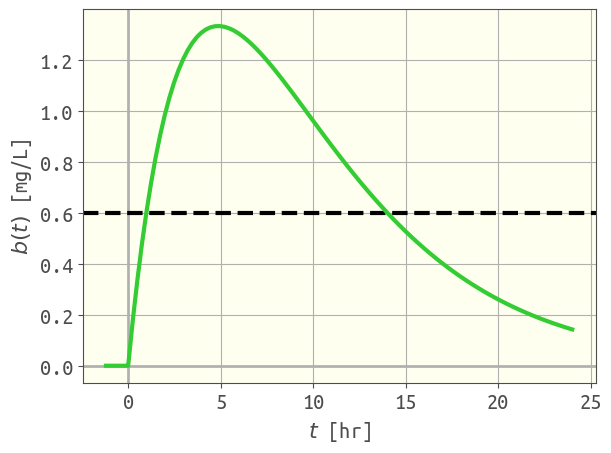

PyObject <matplotlib.lines.Line2D object at 0x7f1c09223630>

In [14]:
viz_response(t, b)
ylabel(L"$b(t)$ [mg/L]")
xlabel(L"$t$ [hr]")
axhline(y=0.6, linestyle="--", color="k")